# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import tensorflow as tf
import pickle
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
import math
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of validation examples
n_validation = len(valid['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# count number of times each label is in dataset
df = pd.DataFrame(train['labels'])
series = pd.Series(train['labels'])
val_list = series.value_counts().sort_values()
# sorted_label_count = []
# for i in range(0, len(val_list)):
#     sorted_label_count.append(val_list[i])

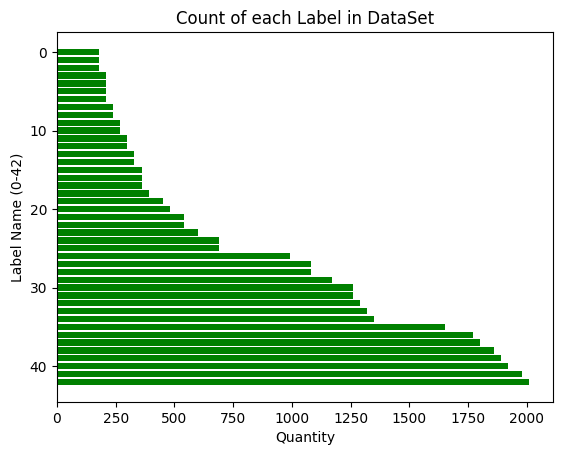

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

plot_y = range(0,len(val_list))

ax.barh(plot_y, val_list, align='center',
        color='green', ecolor='black')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Quantity')
ax.set_ylabel('Label Name (0-42)')
ax.set_title('Count of each Label in DataSet')

plt.show()


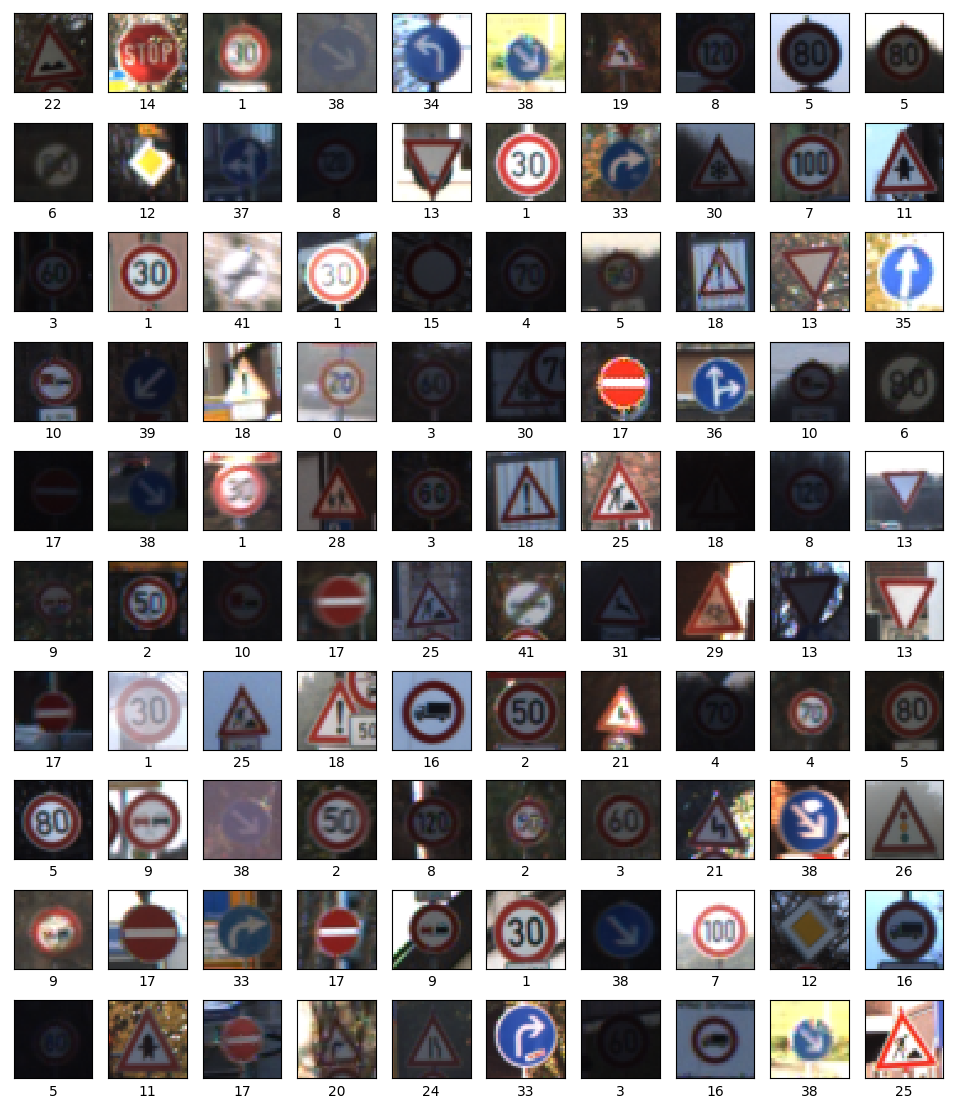

In [5]:
def showRandomImages(gray = False):
    fig = plt.figure(figsize=(10, 10))
    for i in range(0, 100):
        number = np.random.randint(0, len(X_train))
        axis = fig.add_subplot(10,10,i+1)
        axis.set_xlabel(y_train[number])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if not gray:
            axis.imshow(X_train[number])
        else:
            axis.imshow(X_train[number], cmap='gray')
    plt.show()

showRandomImages()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

>"Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

>Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

>Use the code cell (or multiple code cells, if necessary) to implement the first step of your project."

## LeNet Quote about Adding Jitter to Image Set


>Additionally, we build a **jittered dataset** by adding 5
transformed versions of the original training set, yielding
126,750 samples in total. **Samples are randomly perturbed in
position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation
([-15,+15] degrees).** ConvNets architectures have built-in
invariance to small translations, scaling and rotations. **When
a dataset does not naturally contain those deformations,
adding them synthetically will yield more robust learning
to potential deformations in the test set.** We demonstrate the
error rate gain on the validation set in table I. Other realistic
perturbations would **probably also increase robustness such
as other affine transformations, brightness, contrast and blur.**

# Functions to Augment Training / Validation Sets

In [6]:
def toGrayscale(imgSet):
    """
    Convert to Grayscale
    Referenced http://www.tannerhelland.com/3643/grayscale-image-algorithm-vb6/ for grayscale conversion coefficients
    """
    return np.dot(imgSet[...,:3],[0.299,0.587,0.114])

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a, b = [-1., 1.]  # output range (make sure to do 1. to output float vs int)
    xMin, xMax = [0., 255.] #input range
    return (a + np.divide((np.multiply((image_data - xMin),(b - a))), (xMax - xMin)))

def rotate(img, max_rotation):
    # Get row / col info from image shape
    rows, cols = img.shape[:2]
    # Randomly generate an angle 
    angle = np.random.uniform(-max_rotation, max_rotation)
    matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    # Apply rotation
    new_img = cv2.warpAffine(img, matrix, (cols, rows))
    return new_img

def adjust_brightness(img):
    # Randomly generate new brightness level (between 50% and 150%)
    brightness = np.random.uniform(0.5,1.5)
    # Convert to HSV color space (Hue Saturation Value)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img = np.array(img, dtype = np.float64)
    # multiply brightness value by new randomly generated brightness scalar
    img[:,:,2] = img[:,:,2] * brightness
    # Cap values at 255
    img[:,:,2][img[:,:,2] > 255] = 255
    #convert back to 8-bit int
    img = np.array(img, dtype = np.uint8)
    #Convert back to RGB
    new_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    return img

def translate(img, max_translation):
    rows, cols = img.shape[:2]
    # Randomly generate how much image will translate in X and Y direction
    x_trans = np.random.uniform(-max_translation, max_translation)
    y_trans = np.random.uniform(-max_translation, max_translation)
    trans_matrix = np.float32([[1, 0, x_trans], [0, 1, y_trans]])
    new_img = cv2.warpAffine(img, trans_matrix, (cols, rows))
    return new_img

def transformation(img, max_tf):
    rows, cols = img.shape[:2]
    # Define reference points
    pts1 = np.float32([[5,5], [20,5], [5,20]])
    tf_p1 = 5 + np.random.uniform(-max_tf, max_tf)
    tf_p2 = 20 + np.random.uniform(-max_tf, max_tf)
    pts2 = np.float32([[tf_p1, 5], [tf_p2, tf_p1], [5, tf_p2]])
    tf_matrix = cv2.getAffineTransform(pts1, pts2)
    new_img = cv2.warpAffine(img, tf_matrix, (cols,rows))
    return new_img

In [1]:
# rotate_test = rotate(X_train[50], 15.)
# translate_test = translate(X_train[50], 2)
transformation_test = transformation(X_train[66], 2)
plt.figure(figsize=(1,1))
plt.imshow(transformation_test,cmap = 'gray')
plt.show()

NameError: name 'transformation' is not defined

## Generate Augmented Dataset

In [8]:
pickle_file = 'dataset/train_aug.p'
if not os.path.isfile(pickle_file):
    X_train_aug = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype=X_train.dtype)
    y_train_aug = np.empty([0], dtype=y_train.dtype)

    _, class_counts = np.unique(y_train, return_counts = True)
    new_class_size = 2500
    q = 0
    for classes in range(n_classes):
        X_train_aug = np.append(X_train_aug, X_train[y_train==classes], axis=0)
        added = len(X_train[y_train==classes])
        for i in range(new_class_size - class_counts[classes]):
            num = np.random.randint(q, q + added)
            img = np.copy(X_train_aug[num])

            if (i % 4) == 0:
                img = adjust_brightness(img)
            elif (i % 4) == 1:
                img = rotate(img, 15)
            elif (i % 4) == 2:
                img = translate(img, 4)
            else:
                img = transformation(img, 2)

            img = img.reshape(1,32,32,3)
            X_train_aug = np.append(X_train_aug, img, axis=0)

        y_train_aug = np.append(y_train_aug, np.full((new_class_size), classes, dtype=int))
        q += new_class_size

        print("added class {}".format(classes))

    print("Finshed Data Augmentation")


In [9]:
# Make and save augmented data set to pickle file
import os
pickle_file = 'dataset/train_aug.p'
if not os.path.isfile(pickle_file):
    print("Saving augmented dataset to pickle file.")
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'features': X_train_aug,
                    'labels': y_train_aug
                },
                pfile, 2)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise
        
    print("Augmented data saved")

In [10]:
# Load augmented data set

pickle_file = 'dataset/train_aug.p'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train = pickle_data['features']
    y_train = pickle_data['labels']
    del pickle_data #free up memory
    
print("Augmented data set loaded with {} samples".format(len(y_train)))

Augmented data set loaded with 107500 samples


## Implement the Augmentation functions

In [11]:
# Convert to Grayscale
X_train = toGrayscale(X_train)
X_valid = toGrayscale(X_valid)
X_test  = toGrayscale(X_test)
print("Array shapes after grayscale: \n", X_train.shape, X_test.shape, X_valid.shape)

# Normalize input data
X_train = normalize_grayscale(X_train)
X_valid = normalize_grayscale(X_valid)
X_test = normalize_grayscale(X_test)
print("Array shapes after normalization: \n", X_train.shape, X_test.shape, X_valid.shape)

# add back the last column
X_train = np.expand_dims(X_train, -1)
X_valid = np.expand_dims(X_valid, -1)
X_test = np.expand_dims(X_test, -1)

print("Array shapes after adding back in C column: \n",X_train.shape, X_test.shape, X_valid.shape)

Array shapes after grayscale: 
 (107500, 32, 32) (12630, 32, 32) (4410, 32, 32)
Array shapes after normalization: 
 (107500, 32, 32) (12630, 32, 32) (4410, 32, 32)
Array shapes after adding back in C column: 
 (107500, 32, 32, 1) (12630, 32, 32, 1) (4410, 32, 32, 1)


## Shuffle Data

In [12]:
X_train, y_train = shuffle(X_train, y_train)
print(X_train.shape, X_test.shape, X_valid.shape)

(107500, 32, 32, 1) (12630, 32, 32, 1) (4410, 32, 32, 1)


## Model Parameters

In [13]:
tf.reset_default_graph()

EPOCHS = 50
BATCH_SIZE = 256
keep_prob = 0.7
rate = 0.001
run_trainer = True

# Measurements use for graphing loss and accuracy
epoch_log = []
loss_epoch = []
train_acc_epoch = []
valid_acc_epoch = []

## Model Architecture

In [14]:
# Start by implementing LeNet Architecture 
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    if run_trainer is False:
        keep_prob = 1
    else:
        keep_prob = 0.7
    
    # Layer 1: 1st Convolutional with dropout. Input = 32x32x1. Output = 28x28x32   
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1   = tf.add(conv1, conv1_b)
    conv1   = tf.nn.relu(conv1)
    conv1   = tf.nn.dropout(conv1, keep_prob)

    # Layer 2: 2nd Convolutional with max-pool and dropout. Output = 14x14x64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') 
    conv2   = tf.add(conv2, conv2_b)
    conv2   = tf.nn.relu(conv2)
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2   = tf.nn.dropout(conv2, keep_prob)
    # Layer 3: 3rd Convolutional with max-pool and dropout. Output = 7x7x128
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME')
    conv3   = tf.add(conv3, conv3_b)
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    fc0   = flatten(conv3)
    
    # Layer 3: Fully Connected.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(49*128, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [16]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
saver_file = './training/trafficsign.ckpt'

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Things to implement 

- [Image Augmentation Code](https://github.com/vxy10/ImageAugmentation)
- Run color images through network
- normalize with (pixel - 128.) / 128. algo √
- [Batch Normalization](https://discussions.udacity.com/t/batch-normalization/230866/9)
- Make Jitter set to add to training set (data augmentation)
    - [scikit-image(adjust_gamma)](http://scikit-image.org/docs/dev/api/skimage.exposure.html)
- [Inception module?](https://youtu.be/ZG_hoLgNFNo)

>Here is how I do it: (https://discussions.udacity.com/t/the-accuracy-rate-of-the-traffic-sign-classifier/228984/3?u=mattman)

>I take a smaller set of data (20% of training) and then I try to overfit the model
I do a coarse search over the hyperparameters first. Eg. for learning rate I try values like [0.1, 0.01, 0.001, 0.0001]
Then when I find if a value works well, I do a finer search around the value. Eg. of 0.01 works well I then try the following values [0.005, 0.008, 0.01, 0.015, 0.02, 0.03]. And I repeat the process until I find the right learning rate.
Once I find the right learning rate and I have overfitted my model, I incorporate regularization to reduce the overfitting.
>I then incorporate all of the training data to train my model.

## [Underfitting](https://discussions.udacity.com/t/unable-to-reach-93-validation-accuracy/235065/2?u=mattman)
>1. Try with a smaller training data (say just 5 images) and see if you can get the model to over-fit. If you can't, then there is a bug somewhere in the model.
2. Go for more epochs.
3. Try using adam optimiser and ditch the learning rate.


## Overfitting

>1. Do you've dropouts in your model? If not, try adding them, and try experimenting with the dropout values to see if you can get improvements
2. Try adding a L2 regularisation.
3. Add more augmentations such as brightness, zoom, etc...
4. Try equalising with different approaches. Such as using skimage exposure module, or doing a simple (x - mu) / (max - min)

___

# Things implemented

- Adjusted normalization to go between -1 and 1 (previously had been around 0.1 and 0.9
    - Greatly Increased model accuracy and consistency
- Increased EPOCHs to 15
    - raised validation accuracy from 88.9% to 90.3%
- plot training accuracy vs validation accuracy (see TF NN Lab)
    - Made simulation time MUCH Slower

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    batch_count = int(math.ceil(n_train / BATCH_SIZE))
    
    print("Training...")
    print("rate: {} || epochs: {} ||Batches/epoch: {} || Batch Size: {}".format(rate, EPOCHS,batch_count, BATCH_SIZE))
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, l = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        # Log Epochs
        previous_epoch = epoch_log[-1] if epoch_log else 0
        epoch_log.append(1 + previous_epoch)
        loss_epoch.append(l)
        train_acc_epoch.append(training_accuracy)
        valid_acc_epoch.append(validation_accuracy)
        
    saver.save(sess, saver_file)
    print("Model saved")

Training...
rate: 0.001 || epochs: 50 ||Batches/epoch: 136 || Batch Size: 256

EPOCH 1 ...
Training Accuracy = 0.364
Validation Accuracy = 0.419

EPOCH 2 ...
Training Accuracy = 0.681
Validation Accuracy = 0.759

EPOCH 3 ...
Training Accuracy = 0.784
Validation Accuracy = 0.861

EPOCH 4 ...
Training Accuracy = 0.834
Validation Accuracy = 0.885

EPOCH 5 ...
Training Accuracy = 0.865
Validation Accuracy = 0.922

EPOCH 6 ...
Training Accuracy = 0.885
Validation Accuracy = 0.939

EPOCH 7 ...
Training Accuracy = 0.897
Validation Accuracy = 0.932

EPOCH 8 ...
Training Accuracy = 0.908
Validation Accuracy = 0.937

EPOCH 9 ...
Training Accuracy = 0.920
Validation Accuracy = 0.948

EPOCH 10 ...
Training Accuracy = 0.929
Validation Accuracy = 0.953

EPOCH 11 ...
Training Accuracy = 0.932
Validation Accuracy = 0.954

EPOCH 12 ...
Training Accuracy = 0.933
Validation Accuracy = 0.947

EPOCH 13 ...
Training Accuracy = 0.944
Validation Accuracy = 0.962

EPOCH 14 ...
Training Accuracy = 0.949
Validat

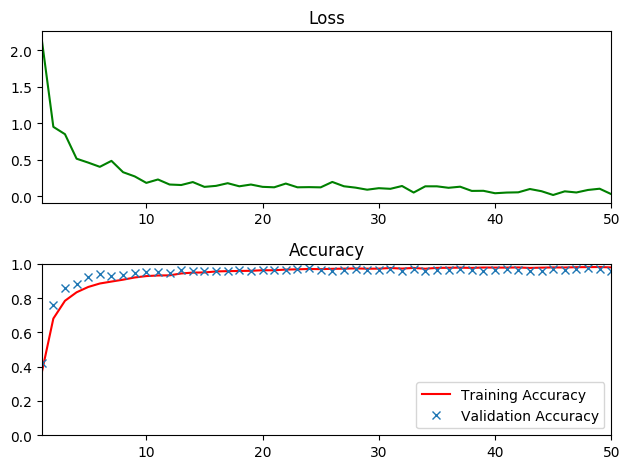

Validation accuracy = 0.9607709750837209


In [21]:
# Plot loss over time
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(epoch_log, loss_epoch, 'g')
loss_plot.set_xlim([epoch_log[0], epoch_log[-1]])

# Plot accuracy over time
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(epoch_log, train_acc_epoch, 'r', label='Training Accuracy')
acc_plot.plot(epoch_log, valid_acc_epoch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([epoch_log[0], epoch_log[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

# Show validation accuracy
print('Validation accuracy = {}'.format(validation_accuracy))

In [23]:
run_trainer = False
with tf.Session() as sess:
    saver.restore(sess, saver_file)
    print("Model restored.")
    
    test_accuracy = evaluate(X_test, y_test)
    
    print('Test accuracy {}'.format(test_accuracy))

Model restored.
Test accuracy 0.9479809974736858


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png']


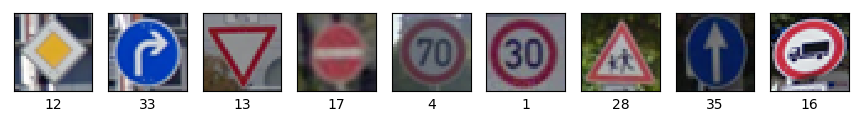

In [55]:
### Load the images and plot them here.
import os.path

new_images = [name for name in os.listdir('./new_images/')]
new_images.sort()
print(new_images)
new_labels = [12,33,13,17,4,1,28,35,16]
test_images = []

def showImages(new_labels = None):
    fig = plt.figure(figsize=(12,14))
    for i in range(0, len(new_images)):
        axis = fig.add_subplot(10,10,i+1)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        
        # Show labels if provided
        if new_labels is not None:
            axis.set_xlabel(new_labels[i])
        img = mpimg.imread('./new_images/' + new_images[i])
        axis.imshow(img)

    # Show the plot
    plt.show()
        
showImages(new_labels)



In [56]:
for i in range(len(new_images)):
    img = mpimg.imread('./new_images/' + new_images[i])
    test_images.append(img)

In [57]:
print(np.array(test_images).shape)

(9, 32, 32, 3)


(9, 32, 32)


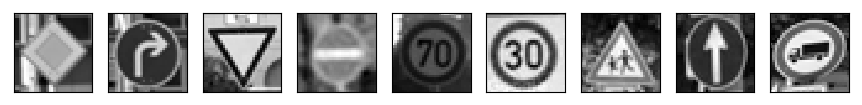

(32, 32, 1)


In [58]:
# Grayscale and normalize
test_images = np.array([toGrayscale(test_images[i]) for i in range(len(test_images))])
print(test_images.shape)
# test_images = np.array([normalize_grayscale(test_images[i]) for i in range(len(test_images))])

fig = plt.figure(figsize=(12,14))
for i in range(0, len(test_images)):
    axis = fig.add_subplot(10,10,i+1)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.imshow(test_images[i], cmap='gray')
plt.show()

if test_images[-1] is not 1:
    test_images = np.expand_dims(test_images, -1)
print(test_images[0].shape)

### Predict the Sign Type for Each Image

Model restored.
Test accuracy: 100.00%
Tensor("ArgMax_11:0", shape=(9,), dtype=int64)


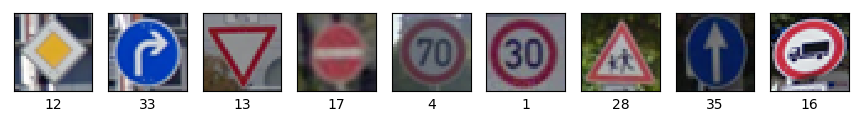

In [59]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

run_trainer = False
with tf.Session() as sess:
    saver.restore(sess, saver_file)
    
    print("Model restored.")
    
    predicted_logits = sess.run(logits, feed_dict={x:np.array(test_images)})
    predicted_labels = tf.argmax(predicted_logits,1)
    softmax = tf.nn.softmax(predicted_logits)
    predicted_classes, prob_classes = sess.run([predicted_labels, softmax], feed_dict={x: test_images})
    
    test_accuracy = (np.sum(predicted_classes == new_labels) / len(new_labels)) * 100.0

    print("Test accuracy: {:2.2f}%".format(test_accuracy))
    print(predicted_labels)
showImages(predicted_classes)


# Check Prediction Accuracy

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [61]:
for i in range(0,len(new_images)):
    top_k = tf.nn.top_k(prob_classes[i], k=5)
    indices = top_k.indices.eval(session=tf.Session())
    values = top_k.values.eval(session=tf.Session())
    
    
    print("Image {}:".format(i+1))
    for j in range(0,5):
        print("Class {} with {:3.2f}%".format(indices[j], values[j] * 100.0))
    print()

Image 1:
Class 12 with 100.00%
Class 13 with 0.00%
Class 40 with 0.00%
Class 41 with 0.00%
Class 25 with 0.00%

Image 2:
Class 33 with 100.00%
Class 35 with 0.00%
Class 42 with 0.00%
Class 36 with 0.00%
Class 5 with 0.00%

Image 3:
Class 13 with 100.00%
Class 0 with 0.00%
Class 1 with 0.00%
Class 2 with 0.00%
Class 3 with 0.00%

Image 4:
Class 17 with 100.00%
Class 12 with 0.00%
Class 9 with 0.00%
Class 32 with 0.00%
Class 41 with 0.00%

Image 5:
Class 4 with 100.00%
Class 1 with 0.00%
Class 0 with 0.00%
Class 26 with 0.00%
Class 8 with 0.00%

Image 6:
Class 1 with 99.88%
Class 4 with 0.11%
Class 0 with 0.01%
Class 2 with 0.00%
Class 15 with 0.00%

Image 7:
Class 28 with 99.81%
Class 11 with 0.09%
Class 29 with 0.08%
Class 19 with 0.01%
Class 3 with 0.00%

Image 8:
Class 35 with 100.00%
Class 13 with 0.00%
Class 36 with 0.00%
Class 37 with 0.00%
Class 28 with 0.00%

Image 9:
Class 16 with 99.94%
Class 8 with 0.04%
Class 7 with 0.01%
Class 3 with 0.00%
Class 5 with 0.00%



In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FM ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
